In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"breast_cancer_data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df.shape

(569, 32)

In [4]:
df.isnull().sum().sum()

0

In [5]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave_points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave_points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [6]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:
df.drop(['id'], axis=1, inplace=True) # Column id doesn't provide useful information
df.shape #col-=1

(569, 31)

In [8]:
df[['radius_mean','perimeter_mean','area_mean']]

,radius_mean,perimeter_mean,area_mean
0,17.99,122.80,1001.0
1,20.57,132.90,1326.0
2,19.69,130.00,1203.0
3,11.42,77.58,386.1
4,20.29,135.10,1297.0
...,...,...,...
564,21.56,142.00,1479.0
565,20.13,131.20,1261.0
566,16.60,108.30,858.1
567,20.60,140.10,1265.0


Visualising correlations between variables

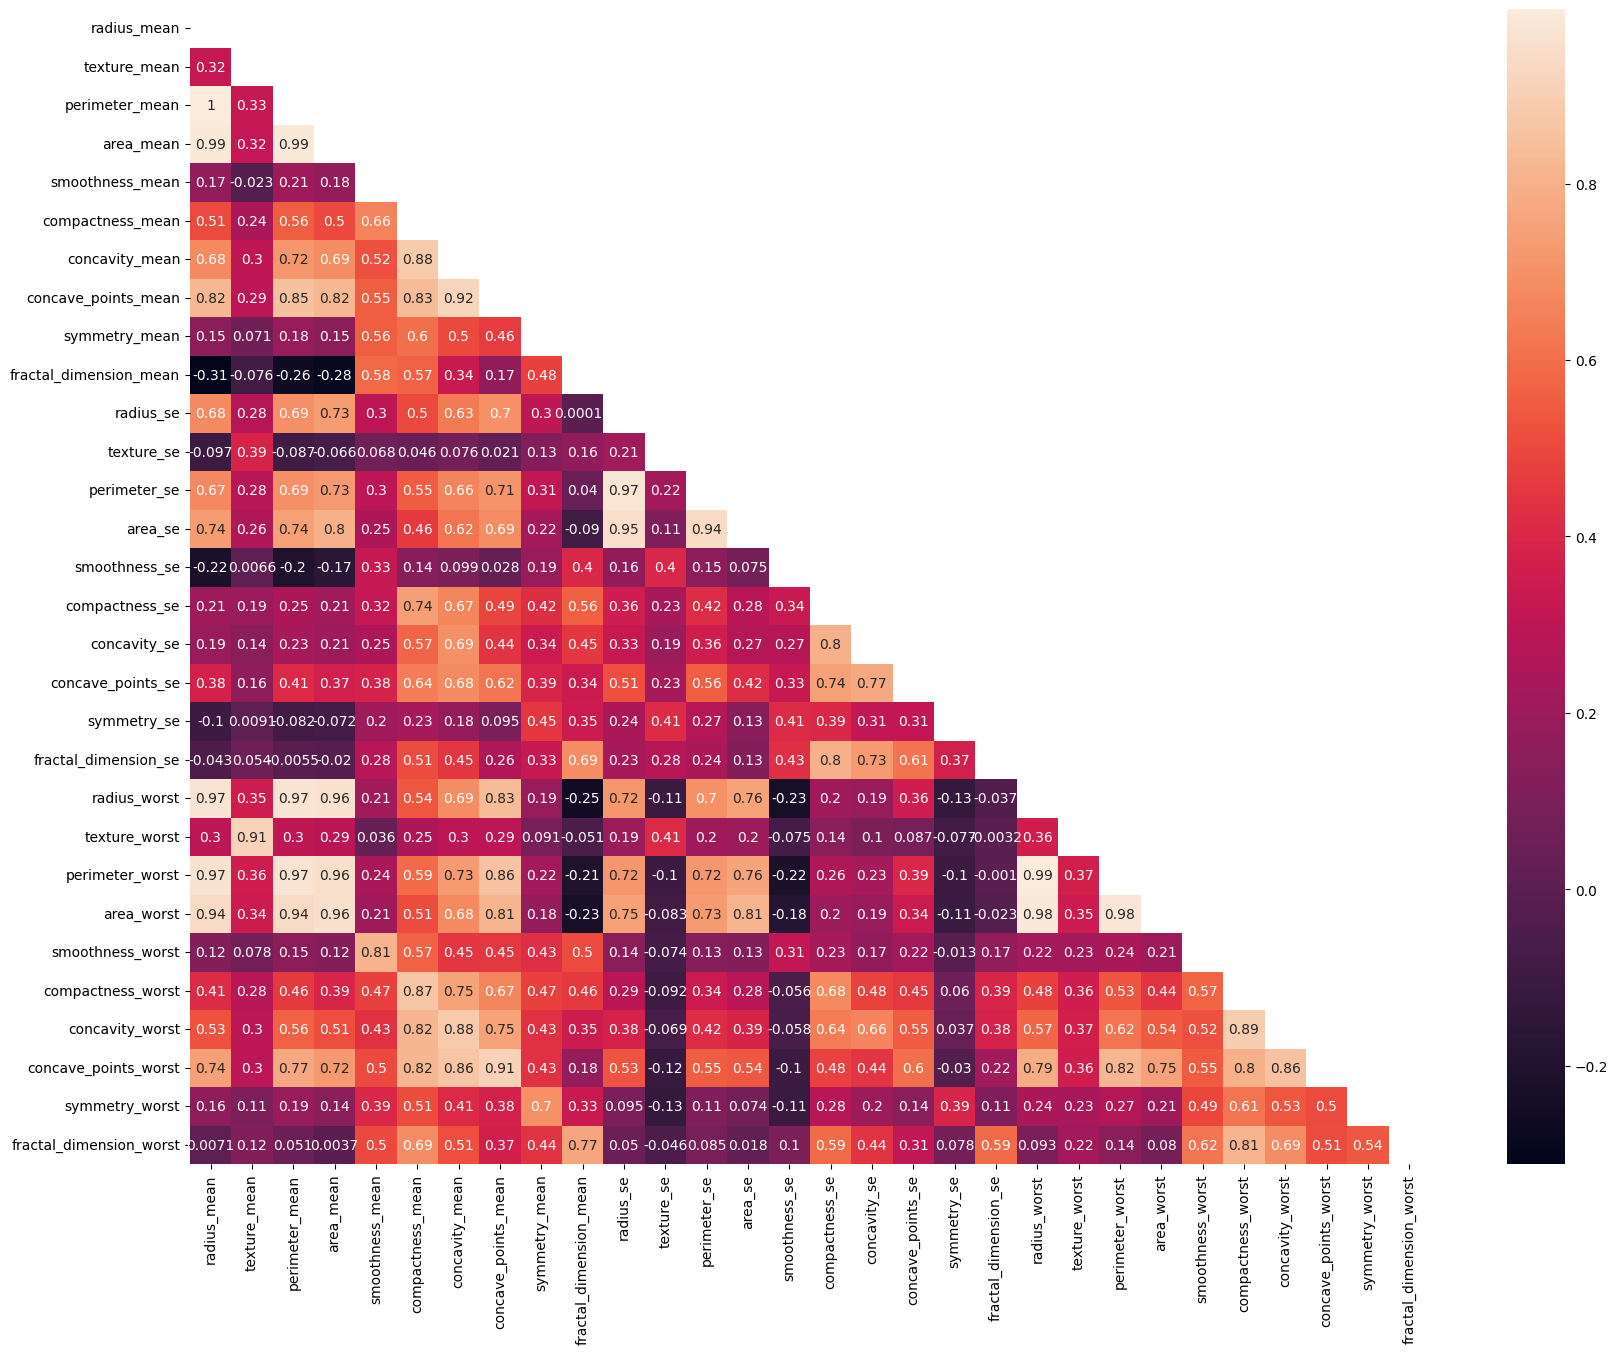

In [9]:
import numpy as np  # Make sure to import numpy

# Drop 'diagnosis' column from the dataframe
df_temp = df.drop(['diagnosis'], axis=1)

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(df_temp.corr(), dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(20, 15))

# Draw the heatmap with the mask
sns.heatmap(df_temp.corr(), annot=True, mask=mask)

# Display the plot
plt.show()



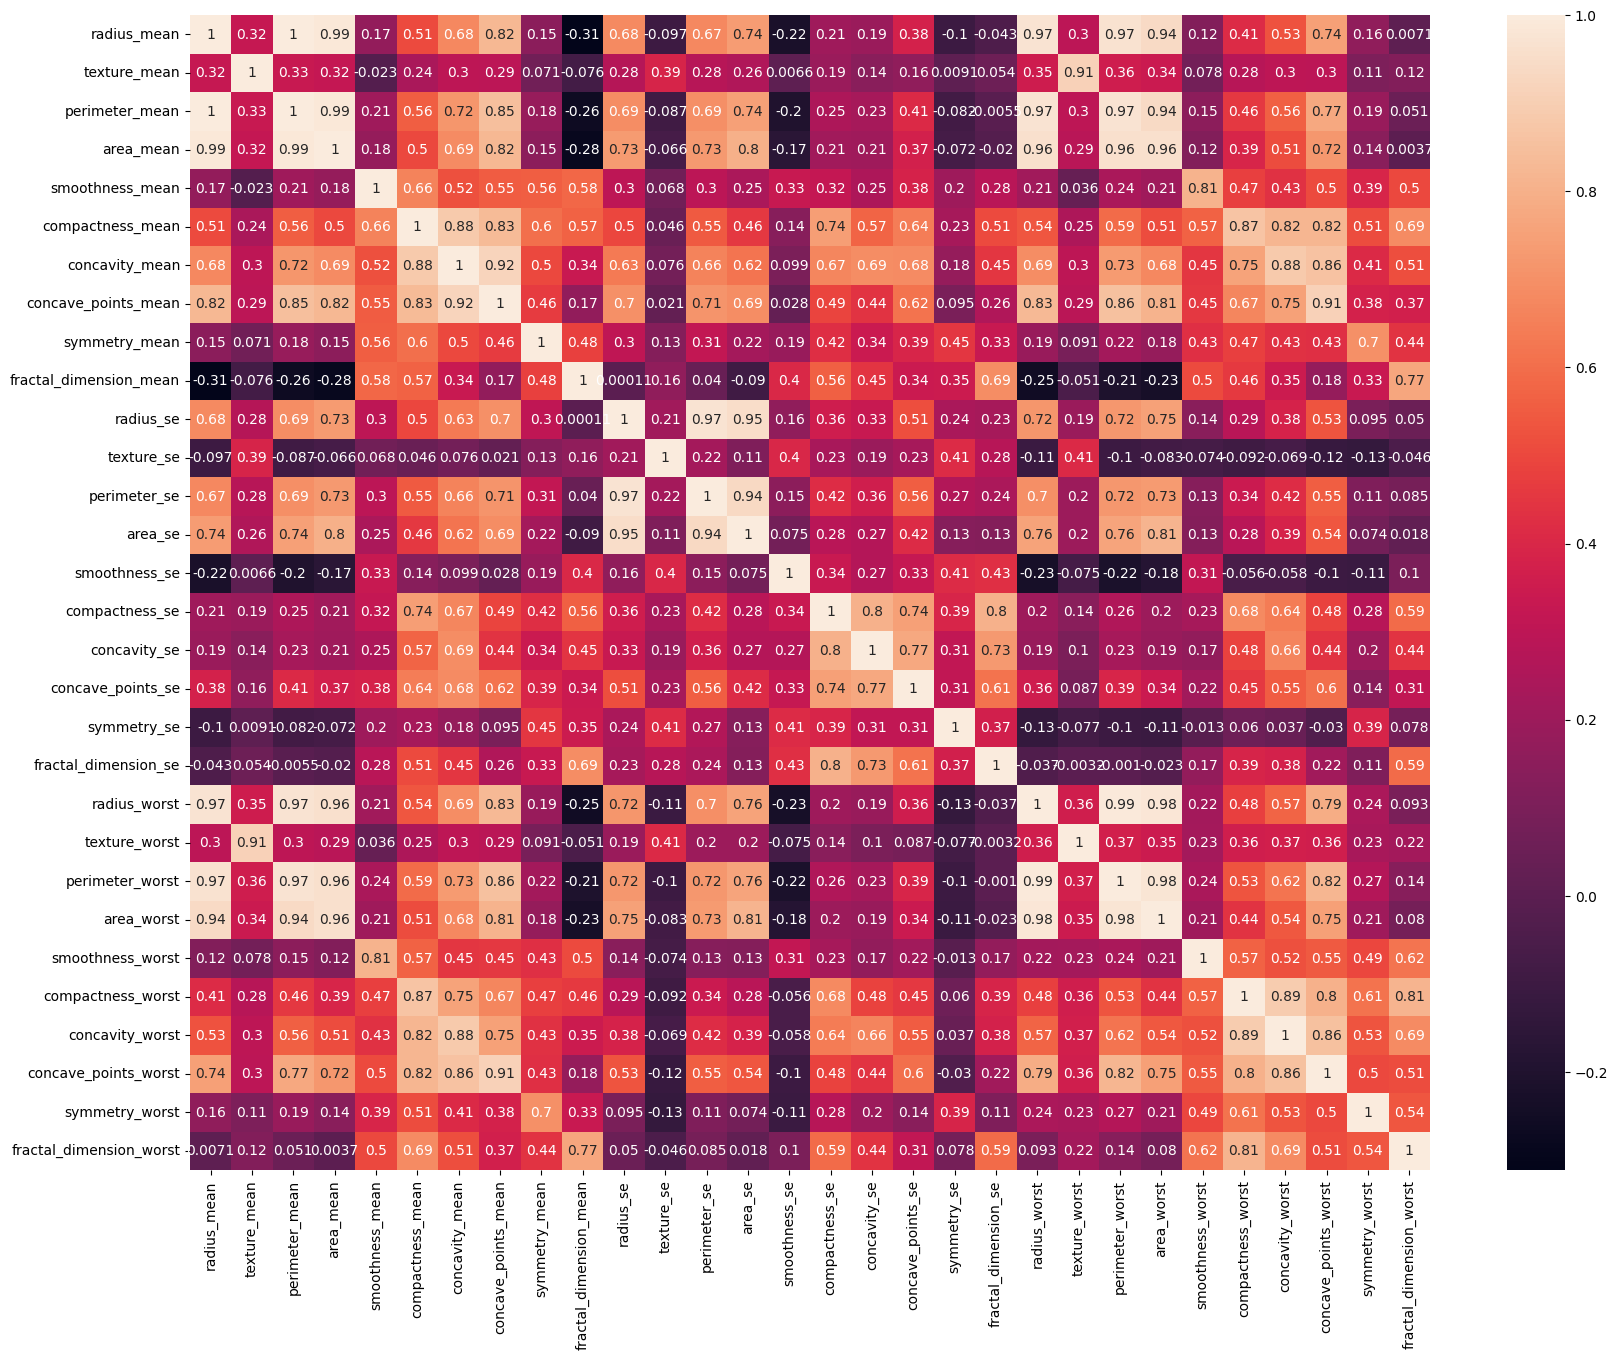

In [10]:
df_temp = df.drop(['diagnosis'], axis=1)
plt.figure(figsize=(20, 15))
sns.heatmap(df_temp.corr(), annot=True)  ##visualizing relationships or patterns in a dataset
plt.show()

In [11]:
corr_coeff = df['smoothness_mean'].corr(df['smoothness_worst'])
print(f"Pearson correlation coefficient between 'smoothness_mean', 'smoothness_worst' is : {corr_coeff}")

Pearson correlation coefficient between 'smoothness_mean', 'smoothness_worst' is : 0.8053241954943628


In [12]:
print(f"Pearson correlation coefficient between 'smoothness_mean', 'smoothness_worst' is : {corr_coeff}")
corr_coeff = df['radius_mean'].corr(df['radius_worst'])
print(f"Pearson correlation coefficient between 'radius_mean', 'radius_worst' is : {corr_coeff}")

Pearson correlation coefficient between 'smoothness_mean', 'smoothness_worst' is : 0.8053241954943628
Pearson correlation coefficient between 'radius_mean', 'radius_worst' is : 0.9695389726112056


Encoding the target variable as binary

In [13]:
df['diagnosis']=df['diagnosis'].map({'M': 0, 'B': 1}) 
df['diagnosis']

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: diagnosis, Length: 569, dtype: int64

Checking the distribution of the response variable (is there class imbalance?)

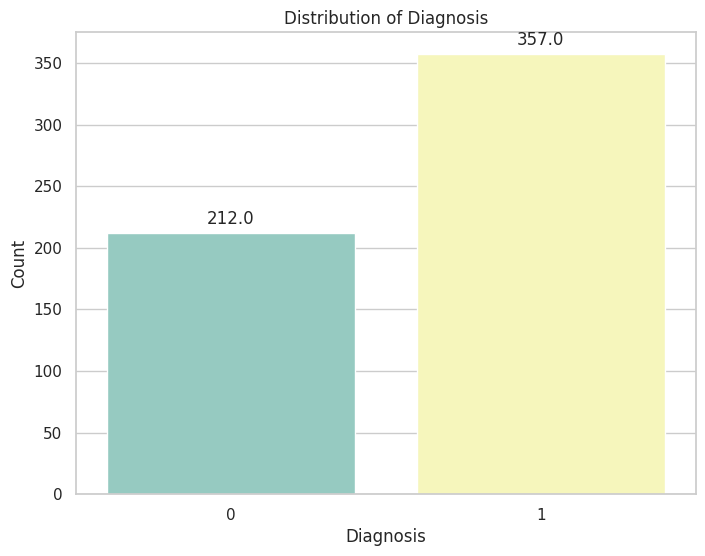

In [14]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(x='diagnosis', data=df, palette='Set3')

plt.title('Distribution of Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Count')

# Display the count values on top of the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

## Balancing the data

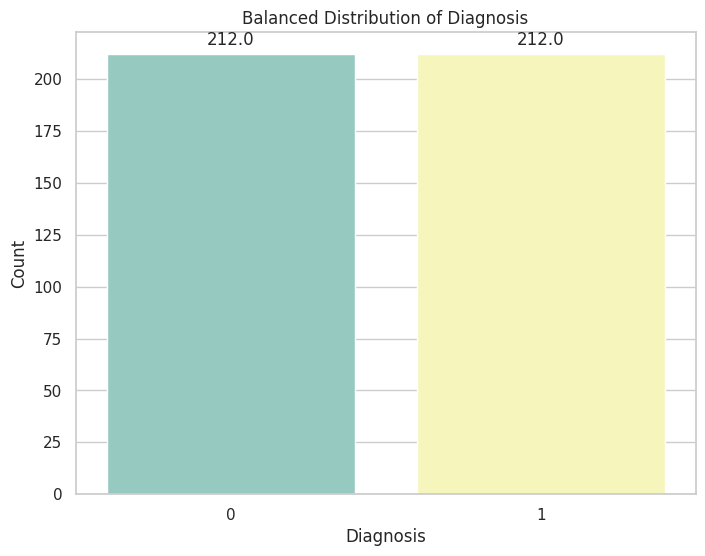

In [15]:

balanced_data = (
    df
    .groupby('diagnosis')
    .apply(lambda x: x.sample(df['diagnosis'].value_counts().min(), random_state=42))
    .reset_index(drop=True)
)

# Plot the balanced distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='diagnosis', data=balanced_data, palette='Set3')

plt.title('Balanced Distribution of Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Count')

# Display the count values on top of the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

Splitting the data in target and response

In [21]:

X = balanced_data.drop(labels='diagnosis', axis=1)
y = balanced_data['diagnosis']

## Logistic Regression

In [22]:
# Pipeline with StandardScaler and LogisticRegression
pipeline_lg = Pipeline([('scalar', StandardScaler()),
                         ('classifier', LogisticRegression(max_iter=100000))
                         ])

#Cross valuation to split the dataset into training and testing
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [23]:
from sklearn.model_selection import cross_validate

scoring_metrics = ['accuracy', 'precision', 'recall']

cv_results = cross_validate(pipeline_lg, X, y, cv=cv, scoring=scoring_metrics, n_jobs=-1, return_train_score=False)

# Print the mean and standard deviation for each metric
for metric in scoring_metrics:
    mean_score = np.mean(cv_results[f'test_{metric}'])
    std_score = np.std(cv_results[f'test_{metric}'])
    print(f"Mean {metric.capitalize()}: {round(mean_score, 3)}  | Std: {round(std_score, 3)}")

Mean Accuracy: 0.966  | Std: 0.026
Mean Precision: 0.967  | Std: 0.034
Mean Recall: 0.967  | Std: 0.044


## Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier

pipeline_dt = Pipeline([('scalar', StandardScaler()),
                         ('classifier', DecisionTreeClassifier(max_depth=10))
                         ])

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
cv_results = cross_validate(pipeline_dt, X, y, cv=cv, scoring=scoring_metrics, n_jobs=-1, return_train_score=False)

# Print the mean and standard deviation for each metric
for metric in scoring_metrics:
    mean_score = np.mean(cv_results[f'test_{metric}'])
    std_score = np.std(cv_results[f'test_{metric}'])
    print(f"Mean {metric.capitalize()}: {round(mean_score, 3)}  | Std: {round(std_score, 3)}")

Mean Accuracy: 0.926  | Std: 0.041
Mean Precision: 0.935  | Std: 0.044
Mean Recall: 0.917  | Std: 0.057


## Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

pipeline_rf = Pipeline([('scalar', StandardScaler()),
                         ('classifier', RandomForestClassifier(max_depth=20))
                         ])
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
cv_results = cross_validate(pipeline_rf, X, y, cv=cv, scoring=scoring_metrics, n_jobs=-1, return_train_score=False)

# Print the mean and standard deviation for each metric
for metric in scoring_metrics:
    mean_score = np.mean(cv_results[f'test_{metric}'])
    std_score = np.std(cv_results[f'test_{metric}'])
    print(f"Mean {metric.capitalize()}: {round(mean_score, 3)}  | Std: {round(std_score, 3)}")

Mean Accuracy: 0.949  | Std: 0.027
Mean Precision: 0.953  | Std: 0.037
Mean Recall: 0.946  | Std: 0.044


## SVM

In [26]:
from sklearn import svm
## Build a linear Support Vector Machine to implement classification:

#Building a model - Linear SVM model (Creating an instance of linear SVM model
#model_linear_svm = svm.SVC(C= 10, gamma= 1, kernel='linear')
#model_linear_svm.fit(X_train, y_train)

## Compare the accuracies of the two models
#y_pred = model_linear_svm.predict(X_test)

#accuracy_svm = accuracy_score(y_test, y_pred)
#print("Accuracy of model_linear_svm:", accuracy_svm)

pipeline_svm = Pipeline([('scalar', StandardScaler()),
                         ('classifier', svm.SVC(C= 10, gamma= 1, kernel='linear'))
                         ])
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
cv_results = cross_validate(pipeline_svm, X, y, cv=cv, scoring=scoring_metrics, n_jobs=-1, return_train_score=False)

# Print the mean and standard deviation for each metric
for metric in scoring_metrics:
    mean_score = np.mean(cv_results[f'test_{metric}'])
    std_score = np.std(cv_results[f'test_{metric}'])
    print(f"Mean {metric.capitalize()}: {round(mean_score, 3)}  | Std: {round(std_score, 3)}")

Mean Accuracy: 0.961  | Std: 0.028
Mean Precision: 0.959  | Std: 0.041
Mean Recall: 0.964  | Std: 0.038


## SGD

In [27]:
from sklearn.linear_model import SGDClassifier

# Create and train the SGDRegressor model
#sgd_regressor = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
#sgd_regressor.fit(X_train, y_train)

# Make predictions on the testing set
#y_pred = sgd_regressor.predict(X_test)

# Calculate mean squared error
#mse = mean_squared_error(y_test, y_pred)
#print("Mean Squared Error:", mse)

# Print the learned coefficients
#print("Weights:", sgd_regressor.coef_)
#print("Bias:", sgd_regressor.intercept_)

#score = accuracy_score(y_test, y_pred)
#print("Accuracy of: ", score)

pipeline_sgd = Pipeline([('scalar', StandardScaler()),
                         ('classifier', SGDClassifier(max_iter=1000, random_state=42))
                         ])
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
cv_results = cross_validate(pipeline_sgd, X, y, cv=cv, scoring=scoring_metrics, n_jobs=-1, return_train_score=False)

# Print the mean and standard deviation for each metric
for metric in scoring_metrics:
    mean_score = np.mean(cv_results[f'test_{metric}'])
    std_score = np.std(cv_results[f'test_{metric}'])
    print(f"Mean {metric.capitalize()}: {round(mean_score, 3)}  | Std: {round(std_score, 3)}")

Mean Accuracy: 0.958  | Std: 0.027
Mean Precision: 0.96  | Std: 0.032
Mean Recall: 0.958  | Std: 0.044


## Part 5: tunning parameters with `GridSearchCV`

In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=100000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(max_depth=20),
    'SGD': SGDClassifier(max_iter=1000, random_state=42),
    'SVM': svm.SVC(gamma=1)
}

# Define your parameter grid
param_grid = {
    'Logistic Regression': {'model__C': [0.01, 0.1, 1, 10, 100]},
    'Decision Tree': {'model__max_depth': [None, 10, 20, 30, 40, 50]},
    'Random Forest': {'model__n_estimators': [10, 50, 100, 200]},
    'SGD': {'model__alpha': [0.0001, 0.001, 0.01, 0.1]},
    'SVM': {
        'model__C': [0.01, 0.1, 1, 10],
        'model__kernel': ['linear', 'rbf']}
}

# Loop through each model, apply StandardScaler, and perform GridSearch
for model_name, model in models.items():
    # Create a pipeline with StandardScaler and the current model
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])

    print(f"Working on model: {model_name}")
    grid_search = GridSearchCV(pipeline, param_grid[model_name], cv=cv, scoring='accuracy')
    grid_search.fit(X, y)

    print(f"Best Parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best Score for {model_name}: {grid_search.best_score_}\n")

Working on model: Logistic Regression
Best Parameters for Logistic Regression: {'model__C': 0.1}
Best Score for Logistic Regression: 0.9709671465485418

Working on model: Decision Tree
Best Parameters for Decision Tree: {'model__max_depth': 20}
Best Score for Decision Tree: 0.9309154669619786

Working on model: Random Forest
Best Parameters for Random Forest: {'model__n_estimators': 200}
Best Score for Random Forest: 0.9537283130306384

Working on model: SGD
Best Parameters for SGD: {'model__alpha': 0.1}
Best Score for SGD: 0.9741232927279438

Working on model: SVM
Best Parameters for SVM: {'model__C': 0.01, 'model__kernel': 'linear'}
Best Score for SVM: 0.9701734957548909



## Part 6: testing removing some features and then re-evaluate models

We're going to test keeping only the 10 features with the highest correlation with the target variable.

In [32]:
import pandas as pd
from scipy.stats import pearsonr


correlations = {}
for column in X.columns:
    correlations[column] = pearsonr(X[column], y)[0]

corr_df = pd.DataFrame.from_dict(correlations, orient='index', columns=['correlation'])

corr_df['abs_correlation'] = corr_df['correlation'].abs()
top_10_features = corr_df.sort_values('abs_correlation', ascending=False).head(10)

# Drop the absolute value column if not needed
top_10_features = top_10_features.drop(columns=['abs_correlation'])

print(top_10_features)


                      correlation
concave_points_worst    -0.791105
perimeter_worst         -0.763152
concave_points_mean     -0.762324
radius_worst            -0.755354
perimeter_mean          -0.726070
radius_mean             -0.713202
area_worst              -0.699592
concavity_mean          -0.679539
area_mean               -0.678509
concavity_worst         -0.650440


We're going to test keeping only the 10 features with the highest correlation with the target variable.

In [37]:
not_top_10_features = list(set(X.columns) - set(top_10_features.index))

In [38]:
grid_features_to_remove = [
  not_top_10_features,
  None]

In [39]:
from sklearn.base import BaseEstimator, TransformerMixin

class FeatureDropper(BaseEstimator, TransformerMixin):
    def __init__(self, features_to_drop=None):
        # features_to_drop can be a list of feature names or None
        self.features_to_drop = features_to_drop
    
    def fit(self, X, y=None):
        # No fitting process required as we're only dropping features
        return self
    
    def transform(self, X):
        # Make a copy of the input DataFrame to avoid altering original data
        X_modified = X.copy()
        
        # If features_to_drop is not None and is a list, drop the specified features
        if self.features_to_drop is not None:
            X_modified = X_modified.drop(self.features_to_drop, axis=1, errors='ignore')
        
        return X_modified

models = [
    ('Logistic Regression', LogisticRegression(max_iter=100000, C=0.1)),
    ('Decision Tree', DecisionTreeClassifier(max_depth=50)),
    ('Random Forest', RandomForestClassifier(n_estimators=100)),
    ('SGD', SGDClassifier(max_iter=1000, random_state=42, alpha=0.01)),
    ('SVM', svm.SVC(gamma=1, C=0.1, kernel='linear'))
]

for model_name, model in models:
    pipeline = Pipeline([
        ('feature_dropper', FeatureDropper(features_to_drop=[None])),  # Initially set to not drop any feature
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])

    # Define a parameter grid, you might need to adjust based on the model
    param_grid = {
        'feature_dropper__features_to_drop': grid_features_to_remove
    }

    grid_search = GridSearchCV(pipeline, param_grid, cv=5)
    grid_search.fit(X, y)


    results = pd.DataFrame(grid_search.cv_results_)[['mean_test_score', 'params']]

    results['dropped_features'] = results['params'].apply(lambda x: x['feature_dropper__features_to_drop'])

    # Now, display the updated DataFrame with the relevant columns
    display_results = results[['mean_test_score', 'dropped_features']].sort_values(by='mean_test_score', ascending=False)
    print(display_results)
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best score for {model_name}: {grid_search.best_score_}")
    print('\n')

   mean_test_score                                   dropped_features
1         0.976443                                               None
0         0.931625  [radius_se, smoothness_mean, symmetry_se, conc...
Best parameters for Logistic Regression: {'feature_dropper__features_to_drop': None}
Best score for Logistic Regression: 0.9764425770308123


   mean_test_score                                   dropped_features
0         0.924538  [radius_se, smoothness_mean, symmetry_se, conc...
1         0.901008                                               None
Best parameters for Decision Tree: {'feature_dropper__features_to_drop': ['radius_se', 'smoothness_mean', 'symmetry_se', 'concave_points_se', 'symmetry_worst', 'fractal_dimension_se', 'fractal_dimension_mean', 'area_se', 'concavity_se', 'compactness_se', 'compactness_worst', 'fractal_dimension_worst', 'smoothness_worst', 'texture_mean', 'compactness_mean', 'perimeter_se', 'texture_se', 'symmetry_mean', 'smoothness_se', 'texture_worst'